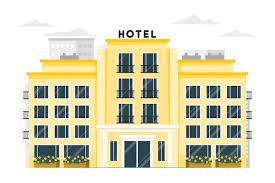

# **Objective:**

The objective of the project is to compare the effectiveness of two clustering methods, Agglomerative Hierarchical Clustering and K-Means Clustering, using a specific dataset.

The dataset contains information related to lodging revenue and customer demographics. The goal is to determine which clustering method yields more meaningful and interpretable clusters based on these features.

By evaluating the Silhouette Score and Davies-Bouldin Score for each clustering method, the project aims to identify the technique that provides the most distinct and well-separated clusters. This analysis will help in understanding the underlying patterns and relationships within the data, ultimately guiding decision-making processes and potentially uncovering insights for targeted marketing or customer segmentation strategies.



In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
import seaborn as sns
import matplotlib.pyplot as plt # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

**GET DATA**

In [27]:
df=pd.read_excel("/content/HotelCustomersDataset.xlsx")
df

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,83586,ITA,54.0,0,0x68010434A46BA6CEAFFACF00B7B7CD0E1825DC56E68F...,0x0A4038E9AE1E4E5A14832BEACEC6BCBE2219F275B65C...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
83586,83587,IRL,47.0,0,0x6DE7954E6AF065D29EF5C57D0DC8120FBAE6753D2CCB...,0xC0654B6A53840DD95DAE429966EC16E2A11FB186CC7B...,109,327.1,277.5,0,...,0,0,0,0,1,0,0,0,0,0
83587,83588,IRL,53.0,0,0x533C977BA6D1D8DFAD8D8D4C2250236D16EFD17B9F35...,0x3DCBEB254247836015CA95F0BBF42E6AF6A158380663...,0,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
83588,83589,IRL,85.0,0,0x58B3CB1975F09BD89EDD4DED8F644D1CCBE6B29C10C7...,0xEB64E8E6820F421508B96820AA3BA49404C01D178FE3...,109,981.3,9.0,0,...,0,0,0,0,0,1,0,0,0,0


**ABOUT THE DATA SET**

**Data Description:** The dataset consists of 83,590 customers' records and includes 31 variables that describe their behavior over a period of three years (2015 to 2018). Along with personal and behavioral data, the dataset also contains demographic and geographical information. All personal related data were transformed or anonymized to guaranty privacy and prevent the hotel or guests’ identification. Time-related variables were accounted for based on the last day of the extraction period. The last day of the extraction period is December 31, 2018.

**Data source location:**  The data came from a four-star hotel located in Lisbon, Portugal, Europe. In Portugal, hotels' star classification scale varies from 1 to 5, with one-star being the low-end quality hotels and five-star being the high-end quality hotels.

**Descriptive variables **

ID: Cutomer Id, Numeric

Nationality: country of origin, Categorical

Age: customer's age (in years), Numeric

Name Hash: Name of the customer's SHA2–256 hash string, categorical

DocID Hash: SHA2–256 hash-string of the identification document number the customer provided at check-in (passport number, national ID card number, or other), Categorical

DistributionChannel: Categorical

MarketSegment: Categorical

**Quantifying Variables**

Average Lead Time: The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer

**Numeric**

Lodging Revenue: Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses, Numeric

Other Revenue: Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses, Numeric

Bookings Canceled: Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay), Numeric

Bookings No Showed: Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel), Numeric

Bookings CheckedIn: Number of bookings the customer made, and which end up with a staying, Numeric

Persons Nights: The total number of persons/nights that the costumer stayed at the hotel. This value is calculated by summing all customers checked-in bookings’ persons/nights. Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children, Numeric

Room Nights: Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking, Numeric

Days Since Last Stay: The number of days elapsed between the last day of the extraction and the customer's last arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, Numeric

Days Since First Stay: The number of days elapsed between the last day of the extraction and the customer's first arrival date (of a checked-in booking). A value of −1 indicates the customer never stayed at the hotel, Numeric

SR High Floor: Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes), Boolean

SR Low Floor: Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes), Boolean

SR Accessible Room: Indication if the customer usually asks for an accessible room (0: No, 1: Yes), Boolean

SR Medium Floor: Indication if the customer usually asks for a room on a middle floor (0: No, 1: Yes), Boolean

SR Bath tub: Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes), Boolean

SR Shower: Indication if the customer usually asks for a room with a shower (0: No, 1: Yes), Boolean

SR Crib: Indication if the customer usually asks for a crib (0: No, 1: Yes), Boolean

SR KingSizeBed: Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes), Boolean

SR TwinBed Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes), Boolean

SR Near Elevator: Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes), Boolean

SR AwayFromElevator: Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes), Boolean

SR No Alcohol In MiniBar: Indication if the customer usually asks for a room with no alcohol in the mini-bar (0: No, 1: Yes),Boolean

SR Quiet Room: Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes), Boolean

In [28]:
df.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'NameHash',
       'DocIDHash', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom'],
      dtype='object')

In [29]:
df_noncat = df[['Age','DaysSinceCreation','AverageLeadTime', 'LodgingRevenue', 'OtherRevenue',
       'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn',
       'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay']]
df_cat = df[['Nationality','DistributionChannel', 'MarketSegment',
       'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor',
       'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed',
       'SRNearElevator', 'SRAwayFromElevator', 'SRNoAlcoholInMiniBar',
       'SRQuietRoom']]

# **Descriptive Analysis of the Dataset**
OBJECTIVES
To understand the descriptive statistics of the non-categorical (non-cat) variables in the dataset

In [30]:
df_noncat.describe()


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay
count,79811.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000,83590.000000
mean,45.398028,453.640902,66.196028,298.802087,67.589132,0.002022,0.000634,0.794617,4.649133,2.358536,401.067137,403.349013
std,16.572368,313.390291,87.758990,372.851892,114.327776,0.066770,0.029545,0.695778,4.567673,2.281746,347.204955,347.971089
min,-11.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,34.000000,177.000000,0.000000,59.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,26.000000,27.000000
50%,46.000000,397.000000,29.000000,234.000000,38.500000,0.000000,0.000000,1.000000,4.000000,2.000000,366.000000,369.000000
75%,57.000000,723.000000,103.000000,402.000000,87.675000,0.000000,0.000000,1.000000,6.000000,4.000000,693.000000,697.000000
max,122.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,116.000000,185.000000,1104.000000,1186.000000


**MAIN OBSERVATIONS**

Average age of the respondents is **45 years**

Average led time of all the respondents being converted to actual revenue brining customers is 66 days

Average lodging revenue for 3 years is Dolar 299 and average of the revenue coming from other sources is Dolar 67 for 3 years

Booking Cancelled and Booking no show rates are almost negligable, indicating that the converation rate is high for the hotel

Day since last stay and first stay go hand in hand, there is hardly any difference in their average values

**INFERENCES**

The hotel can tailor its services and marketing strategies to attract customers in the age group of 45 years. This could include offering amenities and activities that are popular among this age group, such as spa treatments, fitness classes, and cultural experiences.

The reasons for the long led time can be analysed and steps can be taken to reduce it, such as streamlining the booking process, improving communication with customers, and offering incentives for early booking.

The hotel can also analyze the revenue sources and explore ways to increase the revenue from other sources, such as food and beverage sales, event bookings, and merchandise sales. This could include offering unique and high-quality products and experiences that differentiate the hotel from competitors.

The high conversion rate indicates that the hotel is doing a good job of converting bookings into actual revenue. The hotel can continue to focus on providing excellent customer service, personalized experiences, and competitive pricing to maintain and increase its conversion rate.

The similarity in the average values of the day since last stay and first stay suggests that the hotel has a loyal customer base. The hotel can continue to build and strengthen its relationships with existing customers by offering loyalty programs, personalized recommendations, and special promotions. The hotel can also encourage customers to refer their friends and family to increase the customer base.

**OBJECTIVE**

1)To understand the categorical (cat) variables of the dataset


In [31]:
top_15 = df_cat['Nationality'].value_counts().head(15)
fig = px.pie(values = top_15.values,names=top_15.keys(), title='Distribution of Nationalities')
fig.show()

In [32]:
DistributionChannel_stats = pd.concat([df_cat['DistributionChannel'].value_counts(), df_cat['DistributionChannel'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
DistributionChannel_stats

,count,percentage
DistributionChannel,,
Travel Agent/Operator,68569,82.0
Direct,11912,14.0
Corporate,2600,3.0
Electronic Distribution,509,1.0


In [33]:
MarketSegment_stats = pd.concat([df_cat['MarketSegment'].value_counts(), df_cat['MarketSegment'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
MarketSegment_stats

,count,percentage
MarketSegment,,
Other,48039,57.0
Travel Agent/Operator,11670,14.0
Direct,11457,14.0
Groups,9501,11.0
Corporate,2169,3.0
Complementary,510,1.0
Aviation,244,0.0


In [34]:
SRKingSizeBed_stats = pd.concat([df_cat['SRKingSizeBed'].value_counts(), df_cat['SRKingSizeBed'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRKingSizeBed_stats

,count,percentage
SRKingSizeBed,,
0,54109,65.0
1,29481,35.0


In [35]:
SRTwinBed_stats = pd.concat([df_cat['SRTwinBed'].value_counts(), df_cat['SRTwinBed'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRTwinBed_stats

,count,percentage
SRTwinBed,,
0,71675,86.0
1,11915,14.0


In [36]:
SRNoAlcoholInMiniBar_stats = pd.concat([df_cat['SRNoAlcoholInMiniBar'].value_counts(), df_cat['SRNoAlcoholInMiniBar'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
SRNoAlcoholInMiniBar_stats

,count,percentage
SRNoAlcoholInMiniBar,,
0,83580,100.0
1,10,0.0


**OBSERVATIONS**

60% of the customers have their nationality as France, Portugal, Germany and Great Britain, with the maximum 17.3% coming from France and closely followed by protugal, 16.2%.

Among the four distribution channels through which the customers book their rooms in the hotel, namely, Travel Agent/Operator, Direct, Corporate and Electronic Distribution, Travel Agent/Operator constitute the maxium percentage, 82%

Amnong seven the Market segments that the customers can belong to, it is observed that the 57% of the customers cannot be classified in any specifoc segment and come under the 'Others' category. Nevertheless, a total of 39% of the customers belong to Travel Agent/Operator, groups and direct customers.

Further, from all the Boolean variables in the dataset only three variables have been analysed, which are

a. requirements of twin size beds

b. requirements for king size beds

c. requiremnt of alcohol minibars in the room

Only these three variables were used because they directly contribute to the revenue for the hotel.

From these three varaibles the following was observed:

a. Only 35% of the customers asked for king size beds and 14% asked for twin sized beds

b. No customer requested for alocohol minibars in their rooms

**INFERENCES**

The hotel can focus its marketing efforts towards the top nationalities, i.e., France, Portugal, Germany, and Great Britain.

Since Travel Agent/Operator is the most preferred booking channel, the hotel can form partnerships with popular travel agencies to attract more customers.

The hotel can analyze the needs and preferences of customers in the 'Others' category and try to create customized packages or offers to attract more customers.

The hotel can consider introducing more room options with king-size beds to cater to the preferences of customers who prefer larger beds.

# **Data Pre-Processing**

**OBJECTIVES:**

Identifying the null values in both cat and non-cat datasets

1.   Treating the null values by imputation
2.   Numeric coding of cat variables
3.   Identifying outliers using boxplots
4.   Treating the outliers
5.   Combining the pre-processed cat and non-cat dataframes into one (df_ppd)
6.   Diving the combined pre-processed dataset (df_ppd) into two, testing and
     training datasets (test_df and train_df)




**Brief on Analysis:**

The null values in the datasets were indentified using the info() functions

These null values were then treated using Simple Imputer with strategy as 'mean'

Numeric encoding of the categorical variables (Distribution Channel and Market Segment) was done using Label Encoder as the data was nominal

After identifying the outliers in each variable, they were treated using Normalization -> Min-Max Scaling

The cat and non_cat pre-processed datasets were then merged into one using the 'merge' function.

In [37]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Nationality           83590 non-null  object
 1   DistributionChannel   83590 non-null  object
 2   MarketSegment         83590 non-null  object
 3   SRHighFloor           83590 non-null  int64 
 4   SRLowFloor            83590 non-null  int64 
 5   SRAccessibleRoom      83590 non-null  int64 
 6   SRMediumFloor         83590 non-null  int64 
 7   SRBathtub             83590 non-null  int64 
 8   SRShower              83590 non-null  int64 
 9   SRCrib                83590 non-null  int64 
 10  SRKingSizeBed         83590 non-null  int64 
 11  SRTwinBed             83590 non-null  int64 
 12  SRNearElevator        83590 non-null  int64 
 13  SRAwayFromElevator    83590 non-null  int64 
 14  SRNoAlcoholInMiniBar  83590 non-null  int64 
 15  SRQuietRoom           83590 non-null

In [38]:
df_noncat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 79811 non-null  float64
 1   DaysSinceCreation   83590 non-null  int64  
 2   AverageLeadTime     83590 non-null  int64  
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  int64  
 6   BookingsNoShowed    83590 non-null  int64  
 7   BookingsCheckedIn   83590 non-null  int64  
 8   PersonsNights       83590 non-null  int64  
 9   RoomNights          83590 non-null  int64  
 10  DaysSinceLastStay   83590 non-null  int64  
 11  DaysSinceFirstStay  83590 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 7.7 MB


Since, only the 'Age' variable in the non-cat dataset has missing values, it has been treated by simple imputer in the following code.

# **Missing data Imputation**

In [39]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean')
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns)
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83590 entries, 0 to 83589
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 83590 non-null  float64
 1   DaysSinceCreation   83590 non-null  float64
 2   AverageLeadTime     83590 non-null  float64
 3   LodgingRevenue      83590 non-null  float64
 4   OtherRevenue        83590 non-null  float64
 5   BookingsCanceled    83590 non-null  float64
 6   BookingsNoShowed    83590 non-null  float64
 7   BookingsCheckedIn   83590 non-null  float64
 8   PersonsNights       83590 non-null  float64
 9   RoomNights          83590 non-null  float64
 10  DaysSinceLastStay   83590 non-null  float64
 11  DaysSinceFirstStay  83590 non-null  float64
dtypes: float64(12)
memory usage: 7.7 MB


Data encoding
Data encoding was done for 'Ditribution Channel' and 'Market Segment Channel' because these variables directly help in describing the customers and understand their behavior.

In [40]:
df_cat_code = df_cat.copy()

In [41]:
# Using Scikit Learn : Label Encoder (Inferior)
le = LabelEncoder()
le_fit1 = le.fit_transform(df_cat_code['DistributionChannel'])
le_fit2 = le.fit_transform(df_cat_code['MarketSegment'])
df_gen_code = pd.DataFrame(le_fit1, columns=['DistributionChannel_code']); df_gen_code
df_edu_code = pd.DataFrame(le_fit2, columns=['MarketSegment_code']); df_edu_code
df_gen_edu_code = df_gen_code.join(df_edu_code); df_gen_edu_code
df_cat_code_le = df_cat_code.join(df_gen_edu_code); df_cat_code_le # (Missing Data Treated) Numeric Coded Categorical Dataset using Scikit Learn Label Encoder


,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,DistributionChannel_code,MarketSegment_code
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,0,0,0,0,0,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,1,0,0,0,0,0,3,5
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,0,1,0,0,0,0,3,5


**Visualising the outliers**

Box plots for all the non-cat variables was constructed to identify which variable contains the outliers.

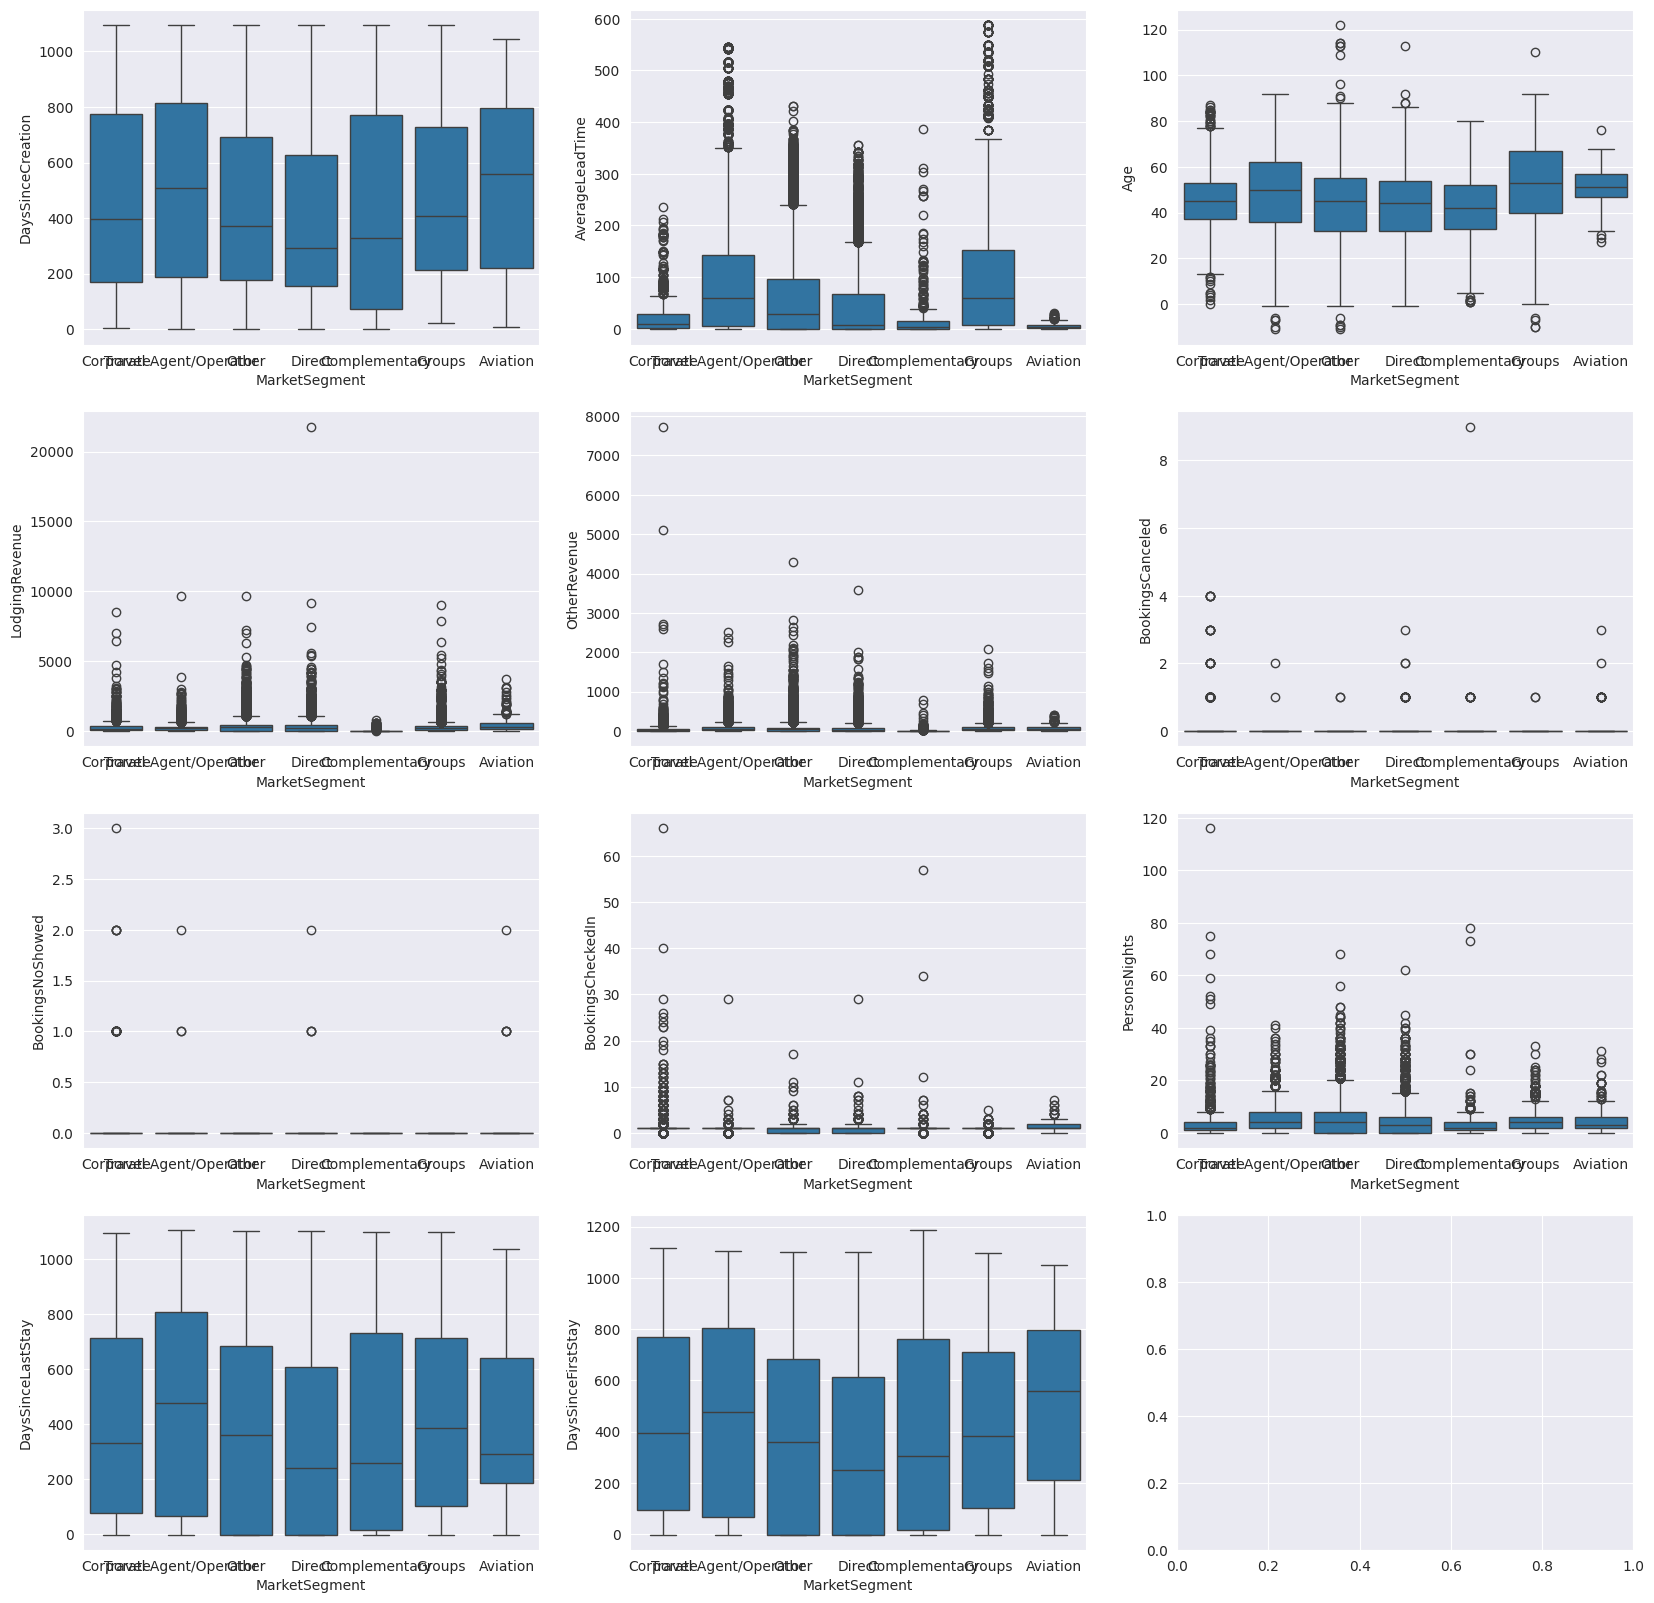

In [42]:
f , axes = plt.subplots(4,3, figsize = (20, 20))

sns.set_style("darkgrid")

fig1 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceCreation', ax = axes[0,0])

fig2 = sns.boxplot(data=df, x='MarketSegment', y='AverageLeadTime', ax = axes [0,1])

fig3 = sns.boxplot(data=df, x='MarketSegment', y='Age', ax = axes [0,2])

fig4 = sns.boxplot(data=df, x='MarketSegment', y='LodgingRevenue', ax = axes [1,0])

fig5 = sns.boxplot(data=df, x='MarketSegment', y='OtherRevenue', ax = axes [1,1])

fig6 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCanceled', ax = axes [1,2])

fig7 = sns.boxplot(data=df, x='MarketSegment', y='BookingsNoShowed', ax = axes [2,0])

fig8 = sns.boxplot(data=df, x='MarketSegment', y='BookingsCheckedIn', ax = axes [2,1])

fig9 = sns.boxplot(data=df, x='MarketSegment', y='PersonsNights', ax = axes [2,2])

fig10 = sns.boxplot(data=df, x='MarketSegment', y='DaysSinceLastStay', ax = axes [3,0])

fig11= sns.boxplot(data=df, x='MarketSegment', y='DaysSinceFirstStay', ax = axes [3,1])

**Observation:**

From the above box plots, it can be clearly seen that 'AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn' and 'PersonsNights' are the variables that contain the outliers. Hence, using normalisation we will be treating these outliers.

**Outlier data treatment**

In [43]:
# Normalization : Min-Max Scaling
mms = MinMaxScaler()
mms_fit = mms.fit_transform(df_noncat_mdi_si[['AverageLeadTime', 'Age', 'LodgingRevenue', 'OtherRevenue',
                                              'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights']])
df_noncat_minmax_norm = pd.DataFrame(mms_fit, columns=['Age_norm', 'AverageleadTime_norm', 'LodgingRevenue_norm',
                                                       'OtherRevenue_norm', 'BookingsCanceled_norm', 'BookingsNoShowed_norm',
                                                      'BookingsCheckedIn_norm', 'PersonsNights_norm'])
df_noncat_minmax_norm
df_noncat_mdt_mmn = df_noncat_mdi_si.join(df_noncat_minmax_norm); df_noncat_mdt_mmn # (Missing Data Treated) Normalized Non-Categorical Dataset using Sikit Learn Min-Max Scaler


,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,PersonsNights,RoomNights,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,51.000000,150.0,45.0,371.0,105.3,1.0,0.0,3.0,8.0,5.0,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,45.398028,1095.0,61.0,280.0,53.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,31.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,60.000000,1095.0,93.0,240.0,60.0,0.0,0.0,1.0,10.0,5.0,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,51.000000,1095.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,54.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,47.000000,0.0,109.0,327.1,277.5,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,53.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,85.000000,0.0,109.0,981.3,9.0,0.0,0.0,1.0,6.0,3.0,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


**Combining the pre-processed cat and non-cat dataframes into one dataframe**

In [44]:
df_cat_ppd = df_cat_code_le.copy(); df_cat_ppd # Preferred Data Subset
df_noncat_ppd = df_noncat_mdt_mmn.copy(); df_noncat_ppd # Preferred Data Subset
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,Nationality,DistributionChannel,MarketSegment,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,PRT,Corporate,Corporate,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,PRT,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,DEU,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,FRA,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,ITA,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,IRL,Travel Agent/Operator,Other,0,0,0,0,0,0,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


In [45]:
df_ppd.columns

Index(['Nationality', 'DistributionChannel', 'MarketSegment', 'SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'Age',
       'DaysSinceCreation', 'AverageLeadTime', 'LodgingRevenue',
       'OtherRevenue', 'BookingsCanceled', 'BookingsNoShowed',
       'BookingsCheckedIn', 'PersonsNights', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm'],
      dtype='object')

In [46]:
#Keeping only the normalised and numeric encoded variables in the data frame for the ease of further analysis
df_ppd1 =df_ppd[['SRHighFloor',
       'SRLowFloor', 'SRAccessibleRoom', 'SRMediumFloor', 'SRBathtub',
       'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed', 'SRNearElevator',
       'SRAwayFromElevator', 'SRNoAlcoholInMiniBar', 'SRQuietRoom',
       'DistributionChannel_code', 'MarketSegment_code', 'DaysSinceCreation', 'RoomNights', 'DaysSinceLastStay',
       'DaysSinceFirstStay', 'Age_norm', 'AverageleadTime_norm',
       'LodgingRevenue_norm', 'OtherRevenue_norm', 'BookingsCanceled_norm',
       'BookingsNoShowed_norm', 'BookingsCheckedIn_norm',
       'PersonsNights_norm']]
df_ppd1

,SRHighFloor,SRLowFloor,SRAccessibleRoom,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,...,DaysSinceLastStay,DaysSinceFirstStay,Age_norm,AverageleadTime_norm,LodgingRevenue_norm,OtherRevenue_norm,BookingsCanceled_norm,BookingsNoShowed_norm,BookingsCheckedIn_norm,PersonsNights_norm
0,0,0,0,0,0,0,0,0,0,0,...,151.0,1074.0,0.078098,0.466165,0.017033,0.013622,0.111111,0.0,0.045455,0.068966
1,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.105263,0.424045,0.012855,0.006856,0.000000,0.0,0.015152,0.086207
2,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.315789,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,1100.0,1100.0,0.159593,0.533835,0.011019,0.007762,0.000000,0.0,0.015152,0.086207
4,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.466165,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83585,0,0,0,0,0,0,0,0,0,0,...,-1.0,-1.0,0.001698,0.488722,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83586,0,0,0,0,0,0,0,1,0,0,...,3.0,3.0,0.186757,0.436090,0.015018,0.035898,0.000000,0.0,0.015152,0.051724
83587,0,0,0,0,0,0,0,1,0,0,...,-1.0,-1.0,0.001698,0.481203,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
83588,0,0,0,0,0,0,0,0,1,0,...,3.0,3.0,0.186757,0.721805,0.045053,0.001164,0.000000,0.0,0.015152,0.051724


## **Formulating Questions**

Given the dataset and the features it includes, here are some key questions we can explore:

*Customer Demographics:*

* What is the age distribution of the customers?
* How does customer nationality impact booking patterns?
Booking Behavior:
* What is the relationship between AverageLeadTime and the likelihood of a booking being canceled or not showing up?
* How do the different MarketSegment and DistributionChannel features impact revenue?

*Revenue Insights:*

* What is the relationship between RoomNights, PersonsNights, and total LodgingRevenue?
* How does OtherRevenue vary with different room preferences (e.g., SRKingSizeBed, SRTwinBed)?

*Customer Loyalty:*

* How does DaysSinceFirstStay and DaysSinceLastStay correlate with repeat bookings?

*Feature Interactions:*

* How do different service requests (e.g., SRQuietRoom, SRBathtub) interact with the likelihood of customer satisfaction (inferred from BookingsCheckedIn)?

*Target Interaction:*

* How do the various features impact the target variables like BookingsCheckedIn and LodgingRevenue?

## **Visualizations**

1. Distributions

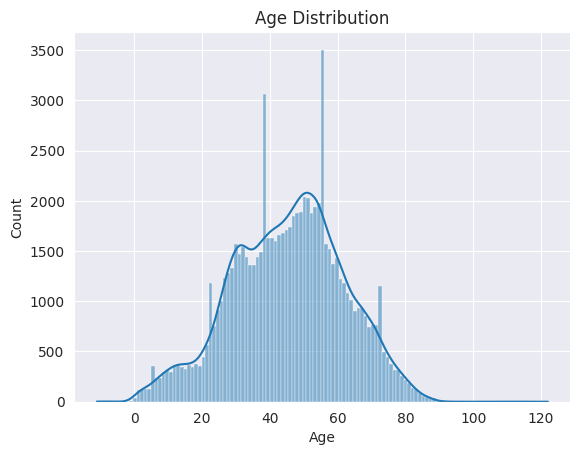

In [47]:
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


2. Boxplots

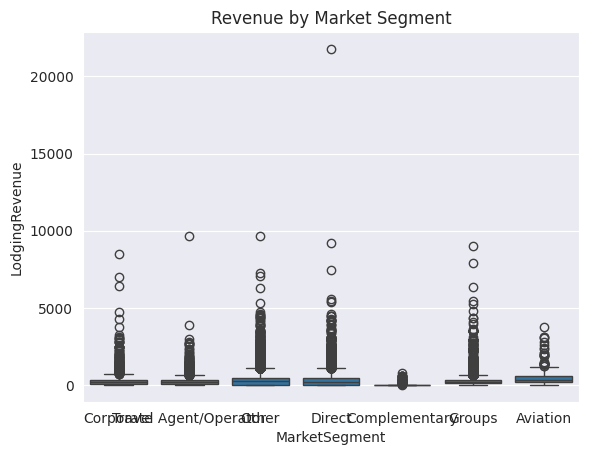

In [48]:
sns.boxplot(x='MarketSegment', y='LodgingRevenue', data=df)
plt.title('Revenue by Market Segment')
plt.show()

3. Heatmaps

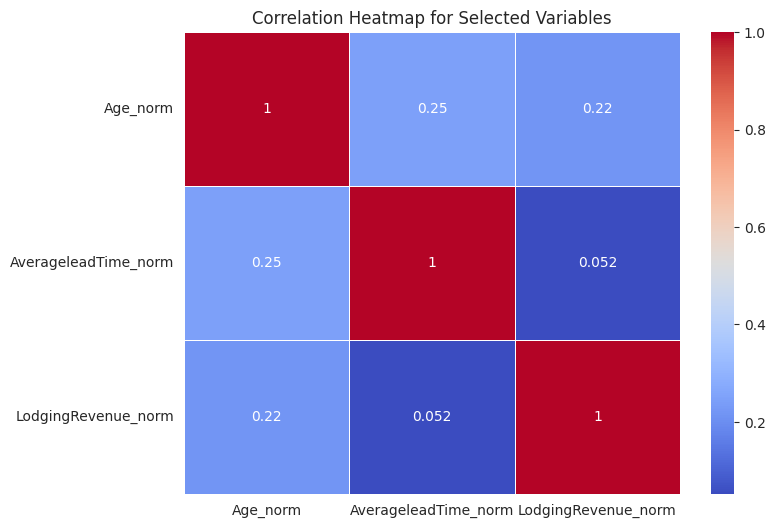

In [53]:
# Assuming df_ppd1 is your DataFrame
selected_columns = ['Age_norm', 'AverageleadTime_norm', 'LodgingRevenue_norm']  # Select your variables of interest

# Compute correlation matrix for the selected variables
selected_corr_matrix = df_ppd1[selected_columns].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(selected_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()



## Observations:
* Correlation between Age and AverageLeadTime (0.25):

There is a weak positive correlation (0.25) between age and average lead time. This suggests that older customers might book slightly earlier than younger ones, but the relationship is not strong.

* Correlation between Age and LodgingRevenue (0.22):

Similarly, the correlation between age and lodging revenue is weakly positive (0.22). This implies that as the age of customers increases, there might be a slight increase in the lodging revenue generated, but again, this relationship is not strong.

* Correlation between AverageLeadTime and LodgingRevenue (0.052):

The correlation between average lead time and lodging revenue is very weak (0.052), indicating almost no linear relationship between how early a customer books and the revenue generated from their lodging. This suggests that other factors likely have a more significant impact on revenue than lead time.

4. Barplots

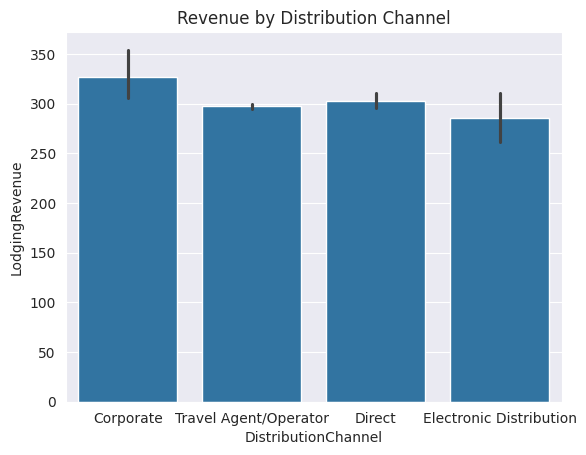

In [54]:
sns.barplot(x='DistributionChannel', y='LodgingRevenue', data=df)
plt.title('Revenue by Distribution Channel')
plt.show()


## **Statistical Tests**

1. Hypothesis Testing

In [56]:
from scipy.stats import ttest_ind

segment1 = df_ppd1[df_ppd1['MarketSegment_code'] == 1]['LodgingRevenue_norm']
segment2 = df_ppd1[df_ppd1['MarketSegment_code'] == 2]['LodgingRevenue_norm']
t_stat, p_value = ttest_ind(segment1, segment2)

print(f'T-statistic: {t_stat}, P-value: {p_value}')


T-statistic: -13.178907379044377, P-value: 1.7835777357642447e-38


**Interpretation**

Hypothesis Tested:

* *Null Hypothesis (H0):* The mean normalized revenue is the same between the two market segments (no significant difference).
* *Alternative Hypothesis (H1):* The mean normalized revenue differs significantly between the two market segments.

* *T-statistic:* The T-statistic of -13.179 indicates that the difference in means between the two market segments is quite large relative to the variability within each segment. A negative value means that the mean normalized revenue of segment 1 is lower than that of segment 2.
* *P-value:* The p-value of 1.7835777357642447e-38 is extremely small, much less than any common significance level (e.g., 0.05, 0.01). This indicates a very strong evidence against the null hypothesis.

* *Conclusion:* Given the extremely low p-value, we can confidently reject the null hypothesis. There is a statistically significant difference in the mean normalized revenue between the two market segments. The negative T-statistic suggests that, on average, segment 1 has a lower normalized revenue compared to segment 2.

2. Chi-square test

In [57]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_ppd1['MarketSegment_code'], df_ppd1['BookingsCheckedIn_norm'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}, P-value: {p}')


Chi-square statistic: 6980.665394754424, P-value: 0.0


**Interpretation**

Hypothesis Tested:

* *Null Hypothesis (H0):* There is no association between MarketSegment_code and BookingsCheckedIn_norm. The variables are independent.

* *Alternative Hypothesis (H1):* There is an association between MarketSegment_code and BookingsCheckedIn_norm. The variables are dependent.
* *Chi-square Statistic:* * *The Chi-square statistic of 6980.665 is very large, indicating a significant deviation from the expected counts under the null hypothesis of independence.
* *P-value:* The p-value of 0.0 (or essentially zero) is extremely small, much less than any conventional significance level (e.g., 0.05, 0.01). This indicates very strong evidence against the null hypothesis.
* *Conclusion:* Given the very low p-value, you can reject the null hypothesis with high confidence. There is a significant relationship between MarketSegment_code and BookingsCheckedIn_norm. This suggests that the distribution of BookingsCheckedIn_norm is not independent of MarketSegment_code and that the market segments influence or are associated with different patterns of bookings checked in.

## **Feature Interaction with Target**

1. Scatter Plots

2. Pair Plots

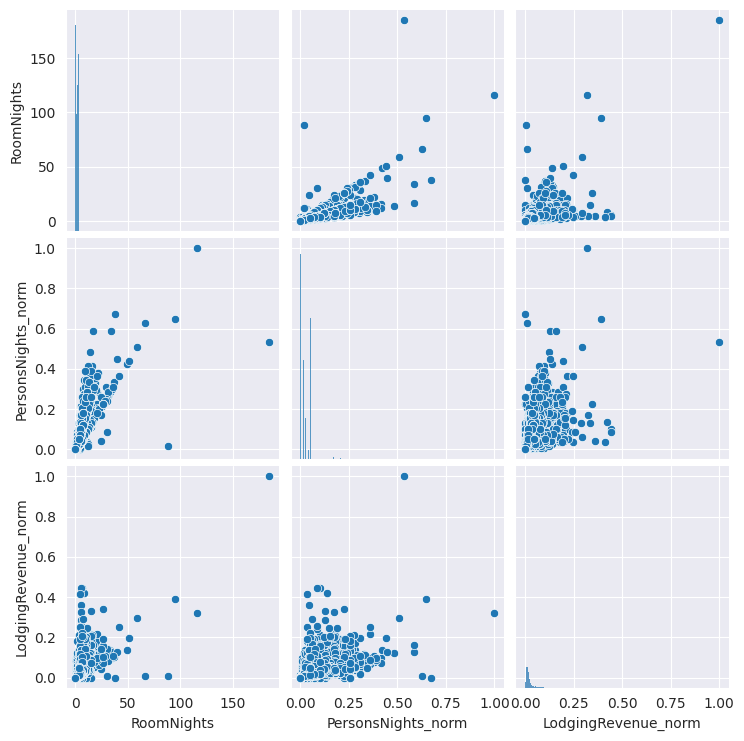

In [59]:
sns.pairplot(df_ppd1, vars=['RoomNights', 'PersonsNights_norm', 'LodgingRevenue_norm'])
plt.show()


## Observations:
* RoomNights vs. PersonsNights_norm:

There is a clear positive relationship between RoomNights and PersonsNights_norm. As the number of room nights increases, the number of person-nights also increases.
The relationship appears almost linear, suggesting that person-nights scale proportionally with the number of room nights booked.

* RoomNights vs. LodgingRevenue_norm:

There is some positive relationship between RoomNights and LodgingRevenue_norm, but it's not as strong or linear as the relationship with PersonsNights_norm.
The data points are more scattered, indicating that while lodging revenue generally increases with the number of room nights, other factors might influence revenue.

* PersonsNights_norm vs. LodgingRevenue_norm:

The relationship between PersonsNights_norm and LodgingRevenue_norm also shows a positive trend, although it is somewhat scattered.
This suggests that more person-nights generally lead to higher lodging revenue, but the relationship is influenced by other variables not captured in this plot.

### **Regression Model to Predict Revenue**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select relevant features for predicting LodgingRevenue_norm
X = df_ppd1[['RoomNights', 'PersonsNights_norm', 'AverageleadTime_norm']]
y = df_ppd1['LodgingRevenue_norm']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.00015866664573120612
R-squared: 0.5070538075588986


In [64]:
# Coefficients of the features
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                      Coefficient
RoomNights               0.003506
PersonsNights_norm       0.111793
AverageleadTime_norm    -0.004955


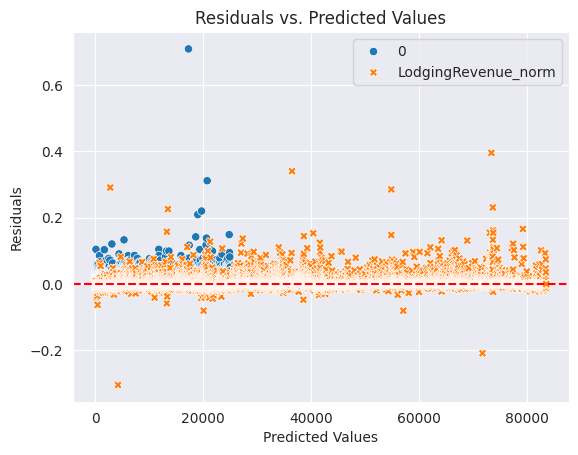

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting residuals
residuals = y_test - y_pred
resi=(y_pred, residuals)
sns.scatterplot(resi)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


1. Mean Squared Error (MSE): 0.00015866664573120612
What It Means: MSE is a measure of the average squared difference between the actual values and the predicted values. A lower MSE indicates a better fit of the model to the data. In this case, the MSE is very low, suggesting that the model predictions are generally close to the actual values.
2. R-squared (R²): 0.5070538075588986
What It Means: R-squared is a measure of how much variance in the dependent variable (LodgingRevenue_norm) is explained by the independent variables (e.g., RoomNights). An R² value of 0.507 indicates that about 50.7% of the variance in LodgingRevenue_norm can be explained by the RoomNights. This suggests that the model has a moderate fit, but there is still a significant amount of variance not captured by the model.
3. Coefficients:
RoomNights: 0.003506
* Interpretation: For every one-unit increase in RoomNights, the normalized LodgingRevenue increases by 0.003506, holding other factors constant. This positive coefficient suggests a direct relationship between room nights and revenue.
  * PersonsNights_norm: 0.111793
Interpretation: For every one-unit increase in PersonsNights_norm, the normalized LodgingRevenue increases by 0.111793. This is a significant positive coefficient, indicating that as the number of person-nights increases, there is a strong positive impact on lodging revenue.
  * AverageleadTime_norm: -0.004955
Interpretation: For every one-unit increase in AverageleadTime_norm, the normalized LodgingRevenue decreases by 0.004955. This negative coefficient suggests that longer lead times might be associated with lower lodging revenue, possibly because customers who book further in advance might be securing lower rates or discounts.
* Summary:
Model Performance: The model has moderate explanatory power (R² ~ 50.7%), but there is room for improvement. The low MSE suggests good accuracy in the model's predictions, but the presence of outliers or the specific characteristics of the data might be impacting performance.

* Impact of Variables:

 * Positive Impact: Both RoomNights and PersonsNights_norm have positive coefficients, indicating that increases in these variables are associated with higher lodging revenue.
 * Negative Impact: AverageleadTime_norm has a negative coefficient, suggesting that longer lead times are linked to lower revenue.

## **Neural Networking Model to Predict Revenue**

In [69]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [70]:
# Select relevant features
X = df_ppd1[['RoomNights', 'PersonsNights_norm', 'AverageleadTime_norm']]
y = df_ppd1['LodgingRevenue_norm']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [71]:
# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Second hidden layer
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(1, activation='linear'))  # Linear activation for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 4.4786e-04 - mae: 0.0107 - val_loss: 1.4957e-04 - val_mae: 0.0071
Epoch 2/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0018 - mae: 0.0148 - val_loss: 1.7118e-04 - val_mae: 0.0056
Epoch 3/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.6765e-04 - mae: 0.0079 - val_loss: 1.7342e-04 - val_mae: 0.0087
Epoch 4/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 2.4648e-04 - mae: 0.0076 - val_loss: 1.6065e-04 - val_mae: 0.0065
Epoch 5/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2.4588e-04 - mae: 0.0073 - val_loss: 1.5525e-04 - val_mae: 0.0063
Epoch 6/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 6.5587e-04 - mae: 0.0095 - val_loss: 1.5150e-04 - val_mae: 0.0052
Epoch 7/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7453e-04 - mae: 0.0064 - val_loss: 1.5156e-04 - val_mae: 0.0060
Epoch 8/100
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5358e-04 - mae: 0.0059 - val_loss: 1

In [73]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



784/784 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Mean Squared Error: 0.00015798414548544876
R-squared: 0.5091742021505645


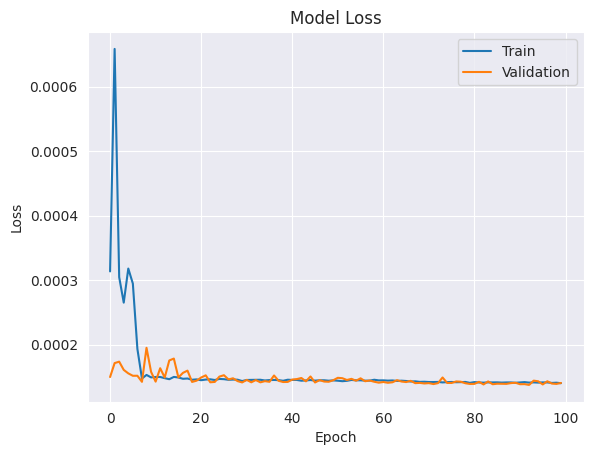

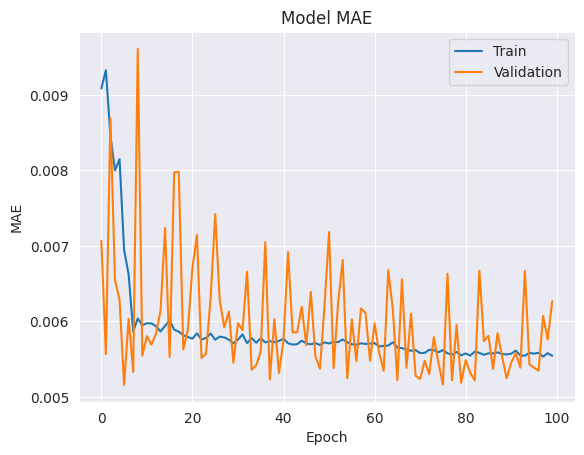

In [74]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation MAE values
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


Interpretation:
* Mean Squared Error (MSE):

The MSE value of 0.00015798 indicates how much the predicted values deviate from the actual values on average. In this case, a lower MSE suggests that the model's predictions are quite close to the actual values. However, the absolute value of MSE alone doesn't tell us much unless we compare it to the scale of the target variable. Given that the target variable (LodgingRevenue_norm) was normalized, this value indicates reasonable prediction accuracy.
* R-squared (R²):

The R-squared value of 0.509 indicates that approximately 50.9% of the variance in LodgingRevenue_norm is explained by the model. While this is a positive result, it also suggests that there is still room for improvement, as almost half of the variance is not captured by the model.